In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

%matplotlib inline

def load_scw_events():

        #Load the Brown and Dowdy (2021, JSHESS) measured SCW events at Melbourne, Sydney, Brisbane (Oakey+Amberley) and Woomera

        df_auto = pd.DataFrame()
        cols = ["gust_time_utc","lat","lon","stn_name","wind_gust"]
        events = pd.read_pickle("/g/data/eg3/ab4502/ExtremeWind/obs/aws/convective_wind_gust_aus_2005_2018.pkl")
        for loc in ["Melbourne","Sydney","Amberley","Oakey","Woomera"]:
            cond = (events["wind_gust"] >= 25) & (events["stn_name"]==loc) & (events["lightning"]>=2)
            loc_events = events[cond][cols]
            df_auto = pd.concat([df_auto,loc_events.set_index("gust_time_utc")], axis=0)

        df_auto.loc[df_auto["stn_name"]=="Melbourne","rid"] = "2"
        df_auto.loc[df_auto["stn_name"]=="Sydney","rid"] = "71"
        df_auto.loc[df_auto["stn_name"]=="Amberley","rid"] = "66"
        df_auto.loc[df_auto["stn_name"]=="Oakey","rid"] = "50"
        df_auto.loc[df_auto["stn_name"]=="Woomera","rid"] = "27"

        df_auto.loc[df_auto["stn_name"]=="Melbourne","stn_id"] = "086282"
        df_auto.loc[df_auto["stn_name"]=="Sydney","stn_id"] = "066037"
        df_auto.loc[df_auto["stn_name"]=="Amberley","stn_id"] = "040004"
        df_auto.loc[df_auto["stn_name"]=="Oakey","stn_id"] = "041359"
        df_auto.loc[df_auto["stn_name"]=="Woomera","stn_id"] = "016001"

        df_auto.loc[df_auto["stn_name"]=="Melbourne","state"] = "vic"
        df_auto.loc[df_auto["stn_name"]=="Sydney","state"] = "nsw"
        df_auto.loc[df_auto["stn_name"]=="Amberley","state"] = "qld"
        df_auto.loc[df_auto["stn_name"]=="Oakey","state"] = "qld"
        df_auto.loc[df_auto["stn_name"]=="Woomera","state"] = "sa"

        return df_auto

In [2]:
pot_cases = load_scw_events()
cases = pd.read_csv("/g/data/eg3/ab4502/figs/ExtremeWind/case_studies/case_study_list.csv")
pot_cases["case"] = 0
pot_cases.loc[pd.DatetimeIndex(cases["gust_time_utc"]),"case"] = 1
pot_cases.loc[(pot_cases["case"]==1) & (pot_cases.stn_name=="Amberley"),"case"] = 2

#The below csv is generated by case_driver.py
pot_case_storm_stats = pd.read_csv("/g/data/eg3/ab4502/figs/ExtremeWind/case_studies/potential_cases.csv")
pot_case_storm_stats = pot_case_storm_stats.set_index(pd.DatetimeIndex(pot_case_storm_stats["gust_time_utc"]))

pot_cases.loc[pot_case_storm_stats["in10km"]==0,"case"] = 3
pot_cases.loc[pot_case_storm_stats["in10km"].isna(),"case"] = 4

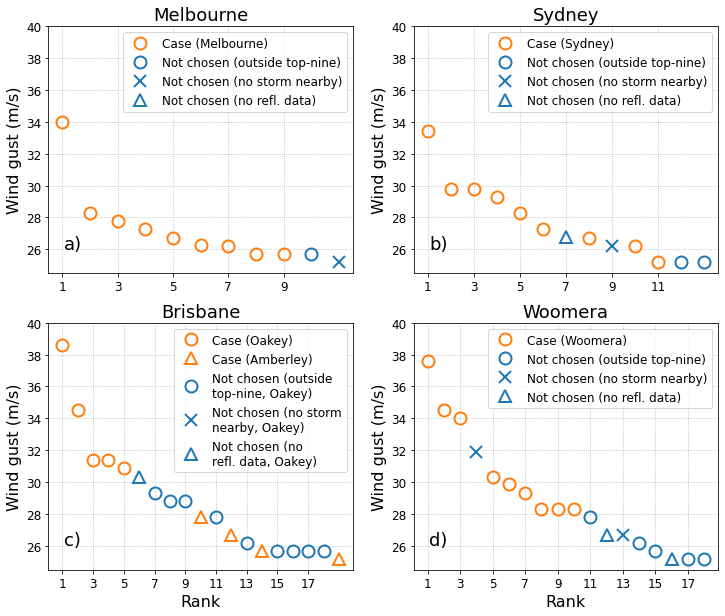

In [3]:
plt.figure(figsize=[12,10])
cnt=0

markers={0:"o",1:"o",2:"^",3:"x",4:"^"}
palette={0:"tab:blue",1:"tab:orange",2:"tab:orange",3:"tab:blue",4:"tab:blue"}
facecolors={0:"none",1:"none",2:"none",3:"tab:blue",4:"none"}
s=12

titles = ["Melbourne","Sydney","Brisbane","Woomera"]
letter = ["a","b","c","d"]
for location in [["Melbourne"],["Sydney"],["Oakey","Amberley"],["Woomera"]]:
    
    ax=plt.subplot(2,2,cnt+1)
    temp = pot_cases[np.in1d(pot_cases.stn_name,location)].sort_values(["wind_gust","case"])
    temp["order"] = np.arange(temp.shape[0],0,-1)

    for c in temp.case.unique():
        ax.plot(temp[temp.case==c].order, temp.wind_gust[temp.case==c], marker=markers[c], color=palette[c],
                  mfc=facecolors[c], mew=2, ms=s, linestyle="none")

    ax.grid(linestyle=":")
    ax.set_ylim([24.5,40])
    ax.set_xticks(np.arange(1,temp.shape[0],2))
    if cnt in [2,3]:
        ax.set_xlabel("Rank", size=16)
    ax.set_ylabel("Wind gust (m/s)", size=16)
    ax.tick_params("both",labelsize=12)
    ax.set_title(titles[cnt],size=18)
    ax.text(0.05,0.1,letter[cnt]+")",size=18,transform=ax.transAxes)
    
    if cnt in [0,1,3]:
        custom = [Line2D([], [], marker='o', color='tab:orange', linestyle='None', mfc="none", ms=s, mew=2),
                    Line2D([], [], marker='o', color='tab:blue', linestyle='None', mfc="none", ms=s, mew=2),
                    Line2D([], [], marker='x', color='tab:blue', linestyle='None', mfc="tab:blue", ms=s, mew=2),
                     Line2D([], [], marker='^', color='tab:blue', linestyle='None', mfc="none", ms=s, mew=2)]
        plt.legend(custom, ['Case ('+location[0]+")", 'Not chosen (outside top-nine)',
                           'Not chosen (no storm nearby)','Not chosen (no refl. data)'], loc='upper right', fontsize=12)
    else:
        custom = [Line2D([], [], marker='o', color='tab:orange', linestyle='None', mfc="none", ms=s, mew=2),
                    Line2D([], [], marker='^', color='tab:orange', linestyle='None', mfc="none", ms=s, mew=2),
                    Line2D([], [], marker='o', color='tab:blue', linestyle='None', mfc="none", ms=s, mew=2),
                    Line2D([], [], marker='x', color='tab:blue', linestyle='None', mfc="tab:blue", ms=s, mew=2),
                    Line2D([], [], marker='^', color='tab:blue', linestyle='None', mfc="none", ms=s, mew=2)]
        plt.legend(custom, ['Case (Oakey)', 'Case (Amberley)', 
                            'Not chosen (outside\ntop-nine, Oakey)',
                            'Not chosen (no storm\nnearby, Oakey)',
                            'Not chosen (no\nrefl. data, Oakey)',], loc='upper right', fontsize=12)        
    
    cnt=cnt+1
    
plt.savefig("/g/data/eg3/ab4502/figs/rank_gust_distribution.jpeg",dpi=400,bbox_inches="tight")

## 

In [4]:
pot_cases[pot_cases.stn_name=="Melbourne"].sort_values(["wind_gust","case"])

,lat,lon,stn_name,wind_gust,rid,stn_id,state,case
gust_time_utc,,,,,,,,
2018-07-17 03:52:00,-37.6655,144.8321,Melbourne,25.2,2,086282,vic,3
2017-12-19 08:50:00,-37.6655,144.8321,Melbourne,25.7,2,086282,vic,0
2010-06-17 00:24:00,-37.6655,144.8321,Melbourne,25.7,2,086282,vic,1
2011-11-18 07:04:00,-37.6655,144.8321,Melbourne,25.7,2,086282,vic,1
2009-11-20 03:06:00,-37.6655,144.8321,Melbourne,26.2,2,086282,vic,1
2006-09-24 01:44:00,-37.6655,144.8321,Melbourne,26.3,2,086282,vic,1
2013-03-21 03:45:00,-37.6655,144.8321,Melbourne,26.7,2,086282,vic,1
2012-02-26 09:11:00,-37.6655,144.8321,Melbourne,27.3,2,086282,vic,1
2011-12-25 06:45:00,-37.6655,144.8321,Melbourne,27.8,2,086282,vic,1
